## Kernel PCA

This example shows the difference between the Principal Components Analysis (PCA) and its kernalized version (KernelPCA).

On the one hand, we show that KernelPCA is able to find a projection of the data which linearly separates them while it is not the case with PCA.

Finally, we show that inverting this projection is an approximation with KernelPCA, while it is exact with PCA.

## Importing Libraries

In [3]:
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

## Projecting data: PCA vs. KernelPCA

In this section, we show the advantages of using a kernel when projecting data using a Principal Component Analysis (PCA). We create a dataset made of some distributions.

In [23]:
def generate_dataset():

    moons = make_moons(n_samples=1000, noise=0.05, random_state=0)
    circles = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
    linearly_separable = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

    dataset = {'MOON': moons, 'CIRCLE': circles, 'LINEAR SEPARABLE': linearly_separable}
    return dataset
dataset = generate_dataset()

Let’s have a quick first look at the generated dataset.

=========MOON=========


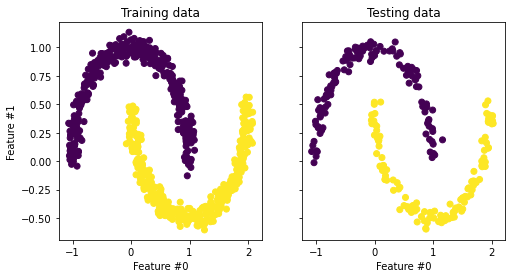

=========CIRCLE=========


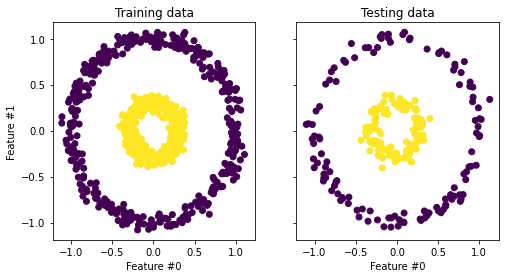

=========LINEAR SEPARABLE=========


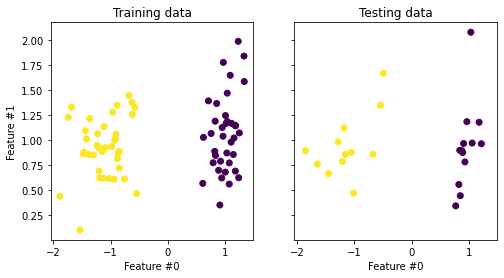

In [24]:
def plot_generated_dataset(X_train, y_train):
    _, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
    
    train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    train_ax.set_ylabel("Feature #1")
    train_ax.set_xlabel("Feature #0")
    train_ax.set_title("Training data")

    test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    test_ax.set_xlabel("Feature #0")
    _ = test_ax.set_title("Testing data")
    plt.show()

for dataset_name, dataset_value in dataset.items():
    X, y = dataset[dataset_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    
    print("========={}=========".format(dataset_name))
    
    #=== VISUALTION OF THE GENERATED DATASET ===
    plot_generated_dataset(X_train, y_train)

The samples from first two classes cannot be linearly separated: there is no straight line that can split the samples of the inner set from the outer set.

Now, we will use PCA with and without a kernel to see what is the effect of using such a kernel. The kernel used here is a radial basis function (RBF) kernel.

In [25]:
def train(X_train, X_test):
    pca = PCA(n_components=2)
    kernel_pca = KernelPCA( n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

    X_test_pca = pca.fit(X_train).transform(X_test)
    X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

    X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
    X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

    return X_test_pca, X_test_kernel_pca, X_reconstructed_pca, X_reconstructed_kernel_pca

=========MOON=========


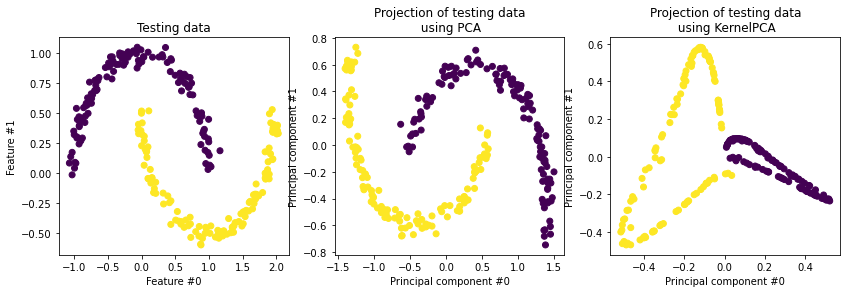

=========CIRCLE=========


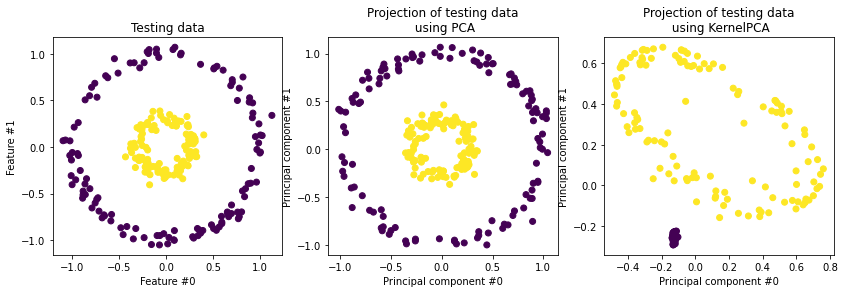

=========LINEAR SEPARABLE=========


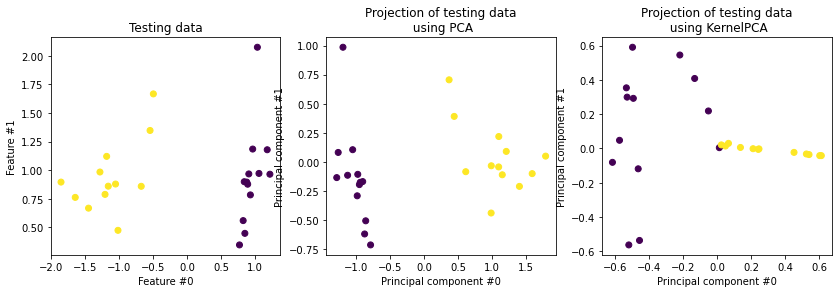

In [27]:
def plot_PCA_KPCA_graphs(X_test_pca, X_test_kernel_pca, y_test):
    fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols=3, figsize=(14, 4))

    orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    orig_data_ax.set_ylabel("Feature #1")
    orig_data_ax.set_xlabel("Feature #0")
    orig_data_ax.set_title("Testing data")

    pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
    pca_proj_ax.set_ylabel("Principal component #1")
    pca_proj_ax.set_xlabel("Principal component #0")
    pca_proj_ax.set_title("Projection of testing data\n using PCA")

    kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
    kernel_pca_proj_ax.set_ylabel("Principal component #1")
    kernel_pca_proj_ax.set_xlabel("Principal component #0")
    _ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")
    plt.show()

for dataset_name, dataset_value in dataset.items():
    X, y = dataset[dataset_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    
    print("========={}=========".format(dataset_name))

    #=== TRAINING THE MODEL USING THE TRAINING DATASET ===
    X_test_pca, X_test_kernel_pca, X_reconstructed_pca, X_reconstructed_kernel_pca = train(X_train, X_test)
    
    #=== VISUALTION OF THE RESULTS GENERATED BY PCA AND KPCA ALGORITHM 
    plot_PCA_KPCA_graphs(X_test_pca, X_test_kernel_pca, y_test)

Thus, looking at the projection made using PCA (i.e. the middle figure), we see that there is no change regarding the scaling; indeed the data being two concentric circles centered in zero, the original data is already isotropic. However, we can see that the data have been rotated. As a conclusion, we see that such a projection would not help if define a linear classifier to distinguish samples from both classes.

Using a kernel allows to make a non-linear projection. Here, by using an RBF kernel, we expect that the projection will unfold the dataset while keeping approximately preserving the relative distances of pairs of data points that are close to one another in the original space.

We observe such behaviour in the figure on the right: the samples of a given class are closer to each other than the samples from the opposite class, untangling both sample sets. Now, we can use a linear classifier to separate the samples from the two classes.

Note: PCA performs better on the linear separable data

## Projecting into the original feature space

One particularity to have in mind when using KernelPCA is related to the reconstruction (i.e. the back projection in the original feature space). With PCA, the reconstruction will be exact if n_components is the same than the number of original features. This is the case in this example.

We can investigate if we get the original dataset when back projecting with KernelPCA.

=========MOON=========


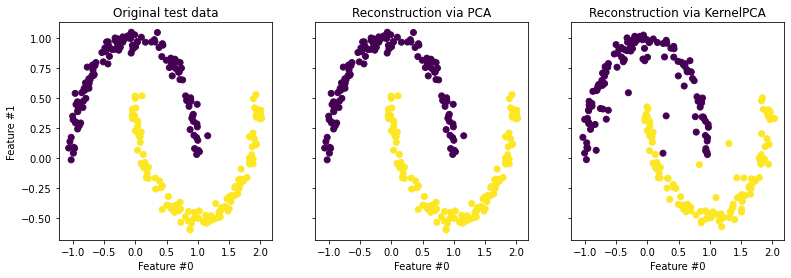

=========CIRCLE=========


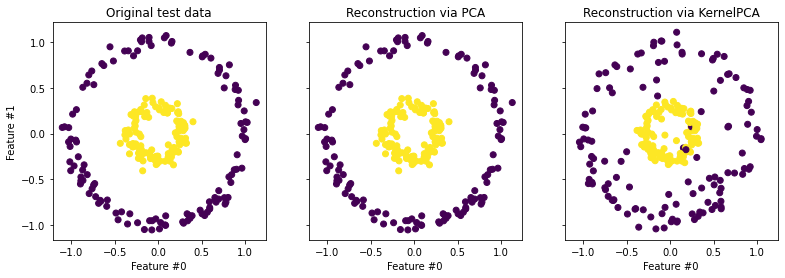

=========LINEAR SEPARABLE=========


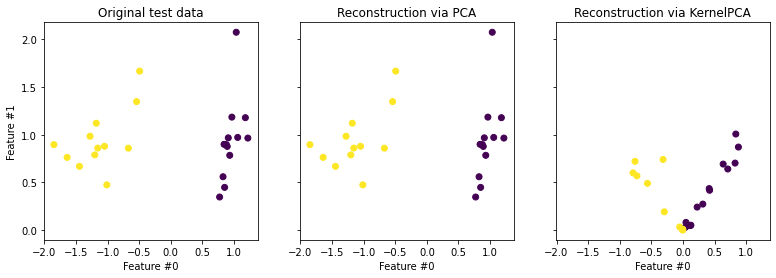

In [28]:
def plot_reconstruction(X_test, y_test, X_reconstructed_pca, X_reconstructed_kernel_pca):
    fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots( ncols=3, sharex=True, sharey=True, figsize=(13, 4))
    
    orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    orig_data_ax.set_ylabel("Feature #1")
    orig_data_ax.set_xlabel("Feature #0")
    orig_data_ax.set_title("Original test data")

    pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
    pca_back_proj_ax.set_xlabel("Feature #0")
    pca_back_proj_ax.set_title("Reconstruction via PCA")

    kernel_pca_back_proj_ax.scatter(
        X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
    )
    kernel_pca_back_proj_ax.set_xlabel("Feature #0")
    _ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")
    plt.show()

for dataset_name, dataset_value in dataset.items():
    
    X, y = dataset[dataset_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    
    print("========={}=========".format(dataset_name))

    #=== TRAINING THE MODEL USING THE TRAINING DATASET ===
    X_test_pca, X_test_kernel_pca, X_reconstructed_pca, X_reconstructed_kernel_pca = train(X_train, X_test)
    
    #=== VISUALISATION OF RECONSTRUCTED GRAPHS ===
    plot_reconstruction(X_test, y_test, X_reconstructed_pca, X_reconstructed_kernel_pca)

While we see a perfect reconstruction with PCA we observe a different result for Kernel PCA.